###### Student Name: Đinh Vũ Ngọc Linh
###### Student ID: ITDSIU21095

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('APPENC02.txt',
                 sep='\s+',
                 header=None,
                 names=[' Id_number',' County','State',
                        'Landarea','Total_population',
                        'Percent_of_population_18-34_',
                        'Percent_of_population_65_or_older',
                        'Number_of_active_physicians',
                        'Number_of_hospital_beds',
                        'Total_serious_crimes',
                        'Percent_high_school_graduates',
                        'Percent_bachelor’s_degrees',
                        'Percent_below_poverty_level',
                        'Percent_unemployment','Per_capita_income',
                        'Total_personal_income',' Geographic_region'])
df.head()

,Id_number,County,State,Landarea,Total_population,Percent_of_population_18-34_,Percent_of_population_65_or_older,Number_of_active_physicians,Number_of_hospital_beds,Total_serious_crimes,Percent_high_school_graduates,Percent_bachelor’s_degrees,Percent_below_poverty_level,Percent_unemployment,Per_capita_income,Total_personal_income,Geographic_region
0,1,Los_Angeles,CA,4060,8863164,32.1,9.7,23677,27700,688936,70.0,22.3,11.6,8.0,20786,184230,4
1,2,Cook,IL,946,5105067,29.2,12.4,15153,21550,436936,73.4,22.8,11.1,7.2,21729,110928,2
2,3,Harris,TX,1729,2818199,31.3,7.1,7553,12449,253526,74.9,25.4,12.5,5.7,19517,55003,3
3,4,San_Diego,CA,4205,2498016,33.5,10.9,5905,6179,173821,81.9,25.3,8.1,6.1,19588,48931,4
4,5,Orange,CA,790,2410556,32.6,9.2,6062,6369,144524,81.2,27.8,5.2,4.8,24400,58818,4


In [3]:
y = df['Number_of_active_physicians']
y_mean = np.mean(y)
y_err = y -y_mean

x1 = df['Total_population']
x1_mean = np.mean(x1)
x1_err = x1 -x1_mean

x2 = df['Number_of_hospital_beds']
x2_mean = np.mean(x2)
x2_err = x2 -x2_mean

x3 = df['Total_personal_income']
x3_mean = np.mean(x3)
x3_err = x3 -x3_mean


In [4]:
b1_x1 = np.sum(x1_err*y_err) / np.sum(x1_err**2)
b0_x1 = y_mean - b1_x1*x1_mean
print(b1_x1, b0_x1)

0.0027954248783588946 -110.6347772326377


- The linear regression model for Toluca dataset is: Y1 = -110.63 + 0.003 * X1 + 𝜖 where 𝜖 𝑁(0, 𝜎).
- The linear regression model for Toluca dataset is: 𝐸{𝑌1 } = -110.63 + 0.003 ∗ 𝑋1.

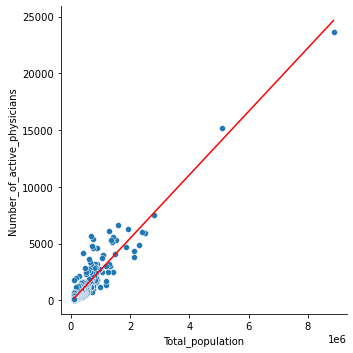

In [5]:
sns.relplot(x='Total_population', y='Number_of_active_physicians', data=df)
sns.lineplot(x=x1, y=b0_x1+b1_x1*x1, color='red')
plt.show()

In [6]:
b1_x2 = np.sum(x2_err*y_err) / np.sum(x2_err**2)
b0_x2 = y_mean - b1_x2*x2_mean
print(b1_x2, b0_x2)

0.7431164439874645 -95.9321847394973


- The linear regression model for Toluca dataset is: Y2 = -95.93 + 0.74 * X2 + 𝜖 where 𝜖 𝑁(0, 𝜎).
- The linear regression model for Toluca dataset is: 𝐸{𝑌2 } = -95.93 + 0.74 ∗ 𝑋2.

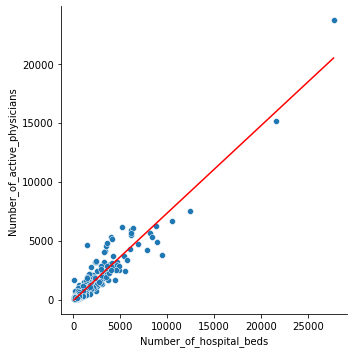

In [7]:
sns.relplot(x='Number_of_hospital_beds', y='Number_of_active_physicians', data=df)
sns.lineplot(x=x2, y=b0_x2+b1_x2*x2, color='red')
plt.show()

In [8]:
b1_x3 = np.sum(x3_err*y_err) / np.sum(x3_err**2)
b0_x3 = y_mean - b1_x3*x3_mean
print(b1_x3, b0_x3)

0.13170118918365611 -48.39484891960376


- The linear regression model for Toluca dataset is: 𝑌3 = -48.4 + 0.13 ∗ 𝑋3 + 𝜖 where 𝜖 𝑁(0, 𝜎).
- The linear regression model for Toluca dataset is: 𝐸{𝑌3 } = -48.4 + 0.13 ∗ 𝑋3.

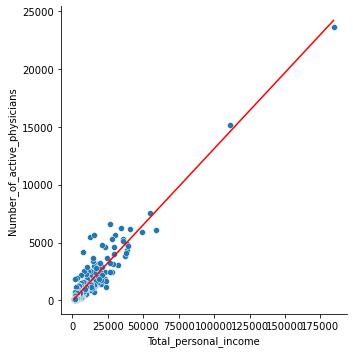

In [9]:
sns.relplot(x='Total_personal_income', y='Number_of_active_physicians', data=df)
sns.lineplot(x=x3, y=b0_x3+b1_x3*x3, color='red')
plt.show()

In [10]:
model_1 = smf.ols('y ~ x1', data=df)
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     3340.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          4.66e-207
Time:                        11:08:01   Log-Likelihood:                -3445.3
No. Observations:                 440   AIC:                             6895.
Df Residuals:                     438   BIC:                             6903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -110.6348     34.746     -3.184      0.002    -178.924     -42.345
x1             0.0028   4.84e-05     57.793      0.000       0.003       0.003
==============================================================================
Omnibus:                      265.471   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2775.183
Skew:                           2.437   Prob(JB):                         0.00
Kurtosis:                      14.297   Cond. No.                     8.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
n1= len(x1)
y_hat_1 = b0_x1 + b1_x1*x1
resid_1 = y - y_hat_1
print(np.sum(resid_1))
print((np.sum((resid_1 - np.mean(resid_1))**2)))
print(np.var(resid_1, ddof=1)*(n1-1))

1.0913936421275139e-11
163025135.15359497
163025135.15359482


In [12]:
SSE_1 = np.sum((y - y_hat_1)**2)
MSE_1 = SSE_1 / (n1-2)
print(MSE_1, SSE_1)
resid_dev_1 = np.sqrt(MSE_1)
resid_dev_1

372203.5049168835 163025135.15359497


610.0848341967562

In [13]:
model_2 = smf.ols('y ~ x2', data=df)
results_2 = model_2.fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     4095.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          2.14e-224
Time:                        11:08:01   Log-Likelihood:                -3405.2
No. Observations:                 440   AIC:                             6814.
Df Residuals:                     438   BIC:                             6823.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -95.9322     31.494     -3.046      0.002    -157.830     -34.034
x2             0.7431      0.012     63.995      0.000       0.720       0.766
==============================================================================
Omnibus:                      193.985   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2549.058
Skew:                           1.524   Prob(JB):                         0.00
Kurtosis:                      14.391   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
n2= len(x2)
y_hat_2 = b0_x2 + b1_x2*x2
resid_2 = y - y_hat_2
print(np.sum(resid_2))
print((np.sum((resid_2 - np.mean(resid_2))**2)))
print(np.var(resid_2, ddof=1)*(n2-1))

6.639311322942376e-11
135864044.99064988
135864044.99064988


In [15]:
SSE_2 = np.sum((y - y_hat_2)**2)
MSE_2 = SSE_2 / (n2-2)
print(MSE_2, SSE_2)
resid_dev_2 = np.sqrt(MSE_2)
resid_dev_2

310191.8835402965 135864044.99064988


556.9487261322146

In [16]:
model_3 = smf.ols('y ~ x3', data=df)
results_3 = model_3.fit()
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     3895.
Date:                Fri, 07 Oct 2022   Prob (F-statistic):          4.28e-220
Time:                        11:08:01   Log-Likelihood:                -3415.2
No. Observations:                 440   AIC:                             6834.
Df Residuals:                     438   BIC:                             6843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -48.3948     31.833     -1.520      0.129    -110.960      14.170
x3             0.1317      0.002     62.409      0.000       0.128       0.136
==============================================================================
Omnibus:                      285.860   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4009.832
Skew:                           2.571   Prob(JB):                         0.00
Kurtosis:                      16.866   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
n3= len(x3)
y_hat_3 = b0_x3 + b1_x3*x3
resid_3 = y - y_hat_3
print(np.sum(resid_3))
print((np.sum((resid_3 - np.mean(resid_3))**2)))
print(np.var(resid_3, ddof=1)*(n3-1))

3.001332515850663e-11
142148254.43029362
142148254.43029377


In [18]:
SSE_3 = np.sum((y - y_hat_3)**2)
MSE_3 = SSE_3 / (n3-2)
print(MSE_3, SSE_3)
resid_dev_3 = np.sqrt(MSE_3)
resid_dev_3

324539.39367646945 142148254.43029362


569.6835908436099

- MSE_1= 372203.5049168835
- SSE_1= 163025135.15359497
- MSE_2= 310191.8835402965
- SSE_2= 135864044.99064988
- MSE_3= 324539.39367646945
- SSE_3= 142148254.43029362

Hence: MSE of model (X2, Y) is the smallest, so the fitted regression line is the line( X2,Y)

In [26]:
SSTO_1 = np.sum((y - b0_x1)**2)
print(SSTO_1)
SSTO_2 = np.sum((y - b0_x2)**2)
print(SSTO_2)
SSTO_3 = np.sum((y - b0_x3)**2)
print(SSTO_3)

1937283386.178249
1923164082.8258522
1878814510.671821


In [36]:
R2_1= 1 - SSE_1/SSTO_1
R2_2= 1 - SSE_2/SSTO_2
R2_3= 1 - SSE_3/SSTO_3
print(R2_1,'\n',R2_2,'\n',R2_3)

0.9158485865740063 
 0.9293538985030261 
 0.9243415176842207
